(rows,colums) = ( 315 , 200 )
image =  [[122 130 133 ... 116 114 119]
 [129 127 131 ... 118 123 126]
 [138 133 140 ... 128 131 125]
 ...
 [101 100  96 ... 104 106  91]
 [119 121 121 ... 158 165 133]
 [108 108 105 ... 173 159  52]]


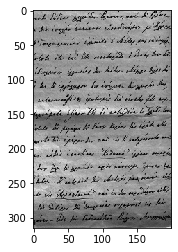

In [1]:
#Μετά τα πειράματα παρατήρησα ότι για μικρές τιμές παραθύρου η εικόνα
#αλλοιώνεται κατά πολύ αλλά η επίδοση του αλγορίθμου είναι καλή ενώ
#για μεγάλο μέγεθος παραθύρου η εικόνα δεν αλλοιώεται αλλά η επίδοση
# του αλγορίθμου πέφτει. Για να επιτευχθεί μια σχετική βελτίωση του
#αλγορίθμου θα μπορούσα να μην κοιτάξω όλες τις τιμές των κατωφλίων 
#αλλά σε αυτή την περίπτωση η εικόνα αλλοιώνεται, όμως όχι αισθητά.  
import sys
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from PIL import Image

#Ελέγχω αν μια εικόνα είναι έγχρωμη και αν είναι
#την μετατρέπει σε ασπρόμαυρη με τον υπολγισμό του
#μέσου όρου των τριών καναλιών RGB. Αν δεν είναι
#έγχρωμη επιστρέφεται απλά η ασπρόμαυρη εικόνα
def if_RGB_Change(im,r,c):
    im = double (im)
    change = np.zeros([r,c])
    if(len(im.shape) == 3):
        for i in range(r):
            for j in range(c):
                change[i][j] = (im[i][j][0]+im[i][j][1]+im[i][j][2])/3
        print("Grey image")
        plt.imshow(change,cmap="gray")
        plt.show()
        return change 
    else:
        return im

#Κάνω την κατωφλίωση της αρχικής εικόνας συγκρίνοντας
#κάθε κελί της με το αντίστοιχο κελί του πίνακα των κατωφλίων
#που προέκυψε απο τους υποπίνακες και την μέθοδο Otsu
def thresholdImage(imageArray,r,c,t):
    array1= np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            if imageArray[i][j] > t[i][j]:
                array1[i][j] = 255
            else:
                array1[i][j]= 0
    return array1

#Για κάθε πίξελ της αρχικής εικόνας υπολογίζω τον υποπίνακα
#όπου το window size είναι άρτιο. Ελέγχω αν τα στοιχεία
#του υποπίνακα βρίσκονται εντός της εικόνας και κρατάω τις τιμές
#του υποπίνακα σε ένα μονοδιάστατο πίνακα. Κρατάω μόνο τα στοιχεία του 
#υποπίνακα που είναι εντός του πλέγματος της αρχικής εικόνας. Με τον 
#τελευταίο πίνακα εκτελώ την μέθοδο Otsu για να βρω το καλύτερο κατώφλι 
#και να το αποθηκεύσω στον πίνακα κατωφλίων.    
def forOddSize(w,r,c):
    n = int(w/2)
    threshold = np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            OtsuArray = np.array([])
            #Χρήση κατάλληλων ορίων για τον υποπίνακα
            for l in range(-n,n+1):
                for k in range(-n,n+1):
                    #Έλγχος για πίξελ του υποπίνακα εκτός ορίων
                    if((i+l)>=0 and (j+k)>=0 and (i+l)<r and (j+k)<c ):
                        g = np.array([newImage[i+l][j+k]])
                        OtsuArray = np.append(OtsuArray,g)
            bestThreshold=0
            bestPrice=0
            for k in range(1,256):
                pixels1 = OtsuArray[OtsuArray<k]
                pixels2 = OtsuArray[OtsuArray>=k]
                #Έλεγχος αν τα πίξελ δεν βρίσκονται σε ένα από τα δύο διαστήματα
                if not((len(pixels1)==0 and len(pixels2)==0) or (len(pixels1)==0 and len(pixels2)!=0) or (len(pixels1)!=0 and len(pixels2)==0)):
                    mu1 = np.mean(pixels1)
                    mu2 = np.mean(pixels2)
                    mu_synoliko = np.mean(OtsuArray.flatten())
                    pi1 = len(pixels1) / (len(pixels1) + len(pixels2))
                    pi2 = len(pixels2) / (len(pixels1) + len(pixels2))
                    newBestPrice = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
                    if (newBestPrice>bestPrice):
                        bestThreshold = k
                        bestPrice = newBestPrice
            threshold[i][j] = bestThreshold
    return threshold
    
#Για κάθε πίξελ της αρχικής εικόνας υπολογίζω τον υποπίνακα
#όπου το window size είναι περιττό. Ελέγχω αν τα στοιχεία
#του υποπίνακα βρίσκονται εντός της εικόνας και κρατάω τις τιμές
#του υποπίνακα σε ένα μονοδιάστατο πίνακα. Κρατάω μόνο τα στοιχεία του 
#υποπίνακα που είναι εντός του πλέγματος της αρχικής εικόνας. Με τον 
#τελευταίο πίνακα εκτελώ την μέθοδο Otsu για να βρω το καλύτερο κατώφλι 
#και να το αποθηκεύσω στον πίνακα κατωφλίων.  
def forEvenSize(w,r,c):
    n = int(w/2)
    threshold = np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            OtsuArray = np.array([])
            #Χρήση κατάλληλων ορίων για τον υποπίνακα
            for l in range(-n,n+1):
                for k in range(-n,n+1):
                    #Έλγχος για πίξελ του υποπίνακα εκτός ορίων
                    if((i+l)>=0 and (j+k)>=0 and (i+l)<r and (j+k)<c ):
                        g = np.array([newImage[i+l][j+k]])
                        OtsuArray = np.append(OtsuArray,g)
            bestThreshold=0
            bestPrice=0
            for k in range(1,256):
                pixels1 = OtsuArray[OtsuArray<k]
                pixels2 = OtsuArray[OtsuArray>=k]
                #Έλεγχος αν τα πίξελ δεν βρίσκονται σε ένα από τα δύο διαστήματα
                if not((len(pixels1)==0 and len(pixels2)==0) or (len(pixels1)==0 and len(pixels2)!=0) or (len(pixels1)!=0 and len(pixels2)==0)):
                    mu1 = np.mean(pixels1)
                    mu2 = np.mean(pixels2)
                    mu_synoliko = np.mean(OtsuArray.flatten())
                    pi1 = len(pixels1) / (len(pixels1) + len(pixels2))
                    pi2 = len(pixels2) / (len(pixels1) + len(pixels2))
                    newBestPrice = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
                    if (newBestPrice>bestPrice):
                        bestThreshold = k
                        bestPrice = newBestPrice
            threshold[i][j] = bestThreshold
    return threshold
                
#Άνοιγμα, αποθήκευση και εμφάνιση της αρχικής εικόνας                       
image = 'trikoupi6_low.png'
f = np.array(Image.open(image))
rows,columns = f.shape[0],f.shape[1]
print("(rows,colums) = (",f.shape[0],',',f.shape[1],')')
print("image = ",f)
plt.imshow(f, cmap="gray")
plt.show()

#Έλεγχος αν η εικόνα είναι έγχρωμη  
newImage = np.zeros([rows,columns])
newImage = if_RGB_Change(f,rows,columns)


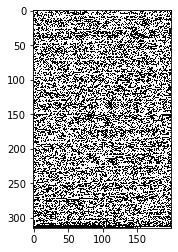

In [2]:
#window_size=2

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 2
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage1.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)

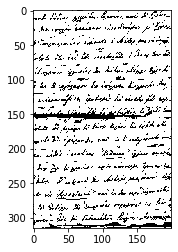

In [3]:
#window_size=15

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 15
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage2.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)

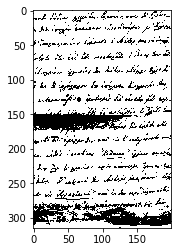

In [4]:
#window_size=70

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 70
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage3.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)

(rows,colums) = ( 168 , 300 )
image =  [[[254 255 237]
  [254 255 237]
  [254 255 237]
  ...
  [ 12   5  21]
  [  6   0   0]
  [  8   0   0]]

 [[254 255 237]
  [254 255 237]
  [254 255 237]
  ...
  [  1   2   0]
  [  0   2   0]
  [  1   1   0]]

 [[254 255 237]
  [254 255 237]
  [254 255 237]
  ...
  [  7   3   0]
  [  8  10   5]
  [  5  11  11]]

 ...

 [[193  34  28]
  [198  40  29]
  [205  48  29]
  ...
  [222  82  23]
  [223  83  22]
  [224  84  23]]

 [[162   3   0]
  [167   8   2]
  [175  17   5]
  ...
  [209  68  14]
  [210  69  13]
  [212  71  15]]

 [[180  21  18]
  [179  20  16]
  [178  20   9]
  ...
  [216  75  22]
  [216  75  22]
  [218  77  23]]]


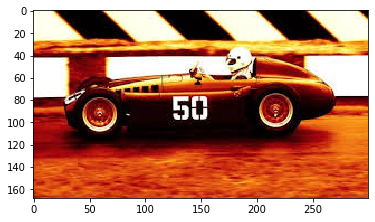

Grey image


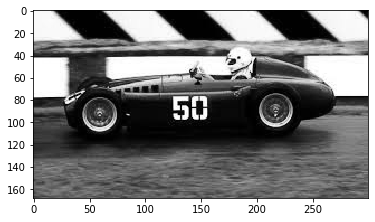

In [5]:
#Άνοιγμα, αποθήκευση και εμφάνιση της αρχικής εικόνας                       
image = 'car.png'
f = np.array(Image.open(image))
rows,columns = f.shape[0],f.shape[1]
print("(rows,colums) = (",f.shape[0],',',f.shape[1],')')
print("image = ",f)
plt.imshow(f, cmap="gray")
plt.show()

#Έλεγχος αν η εικόνα είναι έγχρωμη  
newImage = np.zeros([rows,columns])
newImage = if_RGB_Change(f,rows,columns)

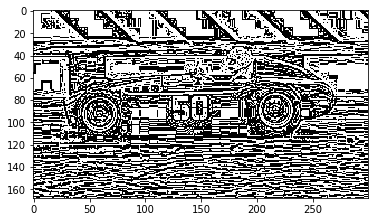

In [6]:
#window_size=3

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 3
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage4.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)

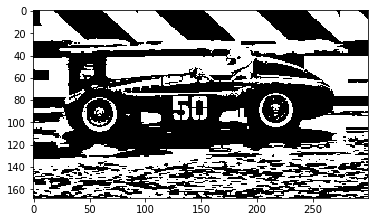

In [7]:
#window_size=20

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 20
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage5.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)

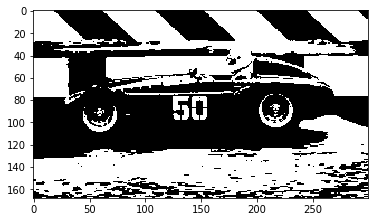

In [8]:
#window_size=65

#Έλεγχος αν το window size είναι περιττό ή άρτιο
#για να καλέσω την κατάλληλη συνάρτηση που δημιουργεί
#σωστά τον υποπίνακα για περιττό ή άρτιο μέγεθος αντίστοιχα
window_size = 65
thresholds = np.zeros([rows,columns])
if(window_size%2==0):
    thresholds=forEvenSize(window_size,rows,columns)
else:
    thresholds=forOddSize(window_size,rows,columns)       

#Κατωφλίωση της αρχικής εικόνας          
thresholdedImage = np.zeros([rows,columns])
thresholdedImage = thresholdImage(newImage,rows,columns,thresholds)

#Εμφάνιση και αποθήκευση της τελικής εικόνας
saveImage = 'newImage6.png'
plt.imshow(thresholdedImage,cmap="gray")
plt.show()
Image.fromarray(thresholdedImage.astype(np.uint8)).save(saveImage)